problem statement-
the market reasearch team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by cardiogood fitness. The market reasearch team decides to investigate whether there are differences accross the product line w.r.t customer characterstics.The team decides to collect the data on individuals who purchased a treadmill at a cardio fitness retail store during the prior three months. 

the team identifies the following customer variables to study : product purchased, TM195,TM498,OR TM798;gender;age;in years;education,in years;realtionship status ,single or partnered;annual income;avg no. of times the customer plans to use the treadmill each week;avg no. of miles the customer expects to walk/run each week;and self-rated fitness on an 1 to 5 scale , where 1 is poor shape and 5 is excellent.

In [2]:
## import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset
df=pd.read_csv("CardioGoodFitness-1.csv")


In [4]:
df.sample(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
51    TM195   29  Female         14     Partnered      2        2   46617   
177   TM798   45    Male         16        Single      5        5   90886   
71    TM195   38    Male         16     Partnered      3        3   56850   
155   TM798   25    Male         18     Partnered      6        5   75946   
96    TM498   24  Female         16        Single      3        3   50028   
158   TM798   26    Male         16     Partnered      5        4   64741   
121   TM498   33  Female         16     Partnered      2        3   50028   
21    TM195   23    Male         16        Single      4        3   40932   
128   TM498   35  Female         14     Partnered      3        2   52302   
61    TM195   34    Male         16        Single      4        5   51165   

     Miles  
51      38  
177    160  
71      75  
155    240  
96     106  
158    180  
121     85  
21      94  
128     53  
61     169

In [5]:
df.shape

(180, 9)

In [6]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.describe(include="all")    #none of the columns are normally distributed

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      TM195         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000

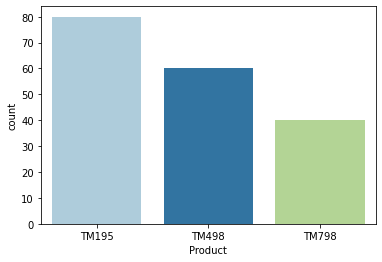

In [10]:
sns.countplot(x="Product",data =df,palette="Paired")  #taller or highest bar one is the mode
plt.show()

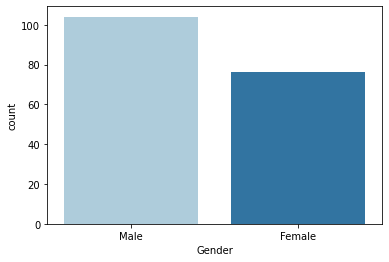

In [11]:
sns.countplot(x="Gender",data =df,palette="Paired")
plt.show()

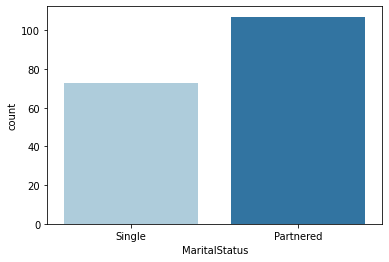

In [12]:
sns.countplot(x="MaritalStatus",data =df,palette="Paired")
plt.show()

In [13]:
import plotly.express as px
fig=px.pie(df,names='Product')
fig

In [14]:
import plotly.express as px
fig=px.pie(df,names='Gender')
fig

In [15]:
import plotly.express as px
fig=px.pie(df,names='MaritalStatus')
fig

In [16]:
df['Product'].nunique()

3

In [17]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [18]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [22]:
df['Gender'].nunique()

2

In [23]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [25]:
df['MaritalStatus'].nunique()

2

In [26]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [27]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

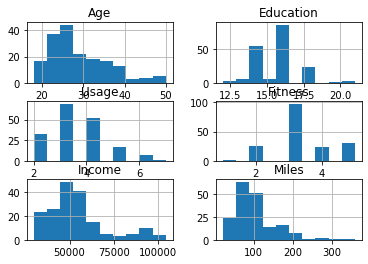

In [20]:
df.hist()
plt.show()

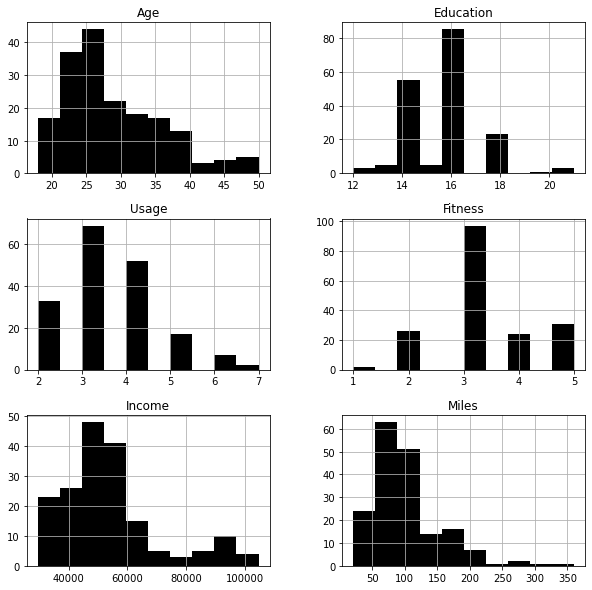

In [21]:
df.hist(figsize=(10,10),color="black")
plt.show()   #none of them is normally distributed

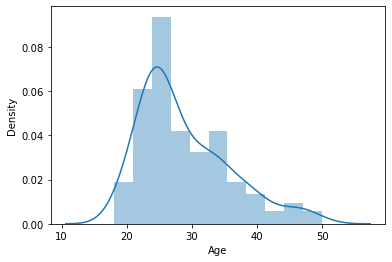

In [28]:
sns.distplot(df["Age"])
plt.show()

In [ ]:
df.skew()  #near to 0 -no skewness , 1- more skewness

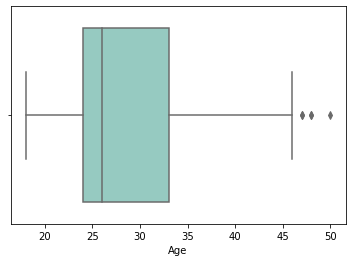

In [30]:
sns.boxplot(x="Age",data=df,palette="Set3")
plt.show()

formula for finding outliers
q1=25%
q3=75%

In [52]:
q3=33
q1=24
iqr=q3-q1    #interquartile range
iqr

9

In [53]:
q1-1.5*iqr  #values lesser than this are ouliers i.e 10.5

10.5

In [54]:
q3+1.5*iqr    #values greater than this are ouliers i.e 46.5

46.5

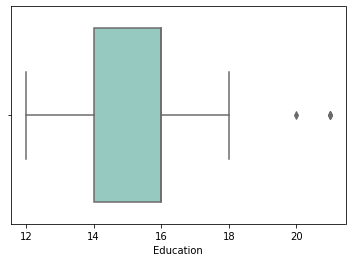

In [32]:
sns.boxplot(x="Education",data=df,palette="Set3")
plt.show()

In [57]:
q3=16
q1=14
iqr=q3-q1    
iqr

2

In [58]:
q1-1.5*iqr

11.0

In [59]:
q3+1.5*iqr

19.0

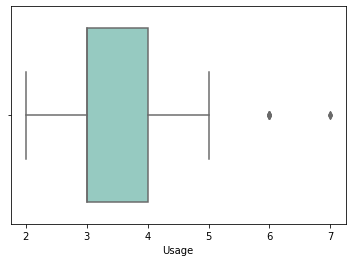

In [33]:
sns.boxplot(x="Usage",data=df,palette="Set3")
plt.show()

In [60]:
q3=4
q1=3
iqr=q3-q1    
iqr

1

In [61]:
q1-1.5*iqr

1.5

In [62]:
q3+1.5*iqr

5.5

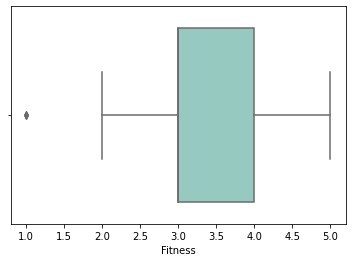

In [34]:
sns.boxplot(x="Fitness",data=df,palette="Set3") # points are the outliers
plt.show()

In [63]:
q3=4
q1=3
iqr=q3-q1    
iqr

1

In [64]:
q1-1.5*iqr

1.5

In [65]:
q3+1.5*iqr

5.5

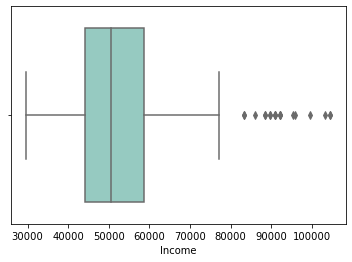

In [35]:
sns.boxplot(x="Income",data=df,palette="Set3")
plt.show()

In [66]:
q3=58668.000000
q1=44058.750000
iqr=q3-q1    
iqr

14609.25

In [67]:
q1-1.5*iqr

22144.875

In [68]:
q3+1.5*iqr

80581.875

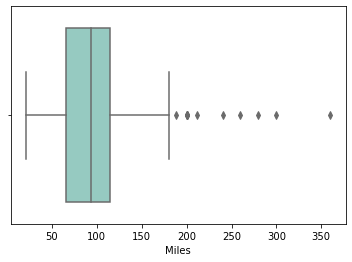

In [36]:
sns.boxplot(x="Miles",data=df,palette="Set3")
plt.show()

In [72]:
q3=114.75
q1=66.00
iqr=q3-q1    
iqr

48.75

In [73]:
q1-1.5*iqr

-7.125

In [74]:
q3+1.5*iqr

187.875

<AxesSubplot:xlabel='Product', ylabel='count'>

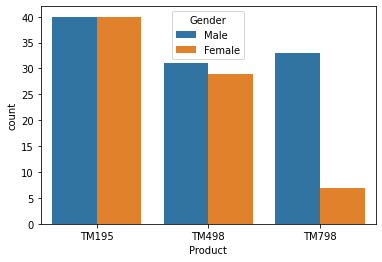

In [40]:
sns.countplot(x="Product",hue="Gender",data=df)


<AxesSubplot:xlabel='Product', ylabel='count'>

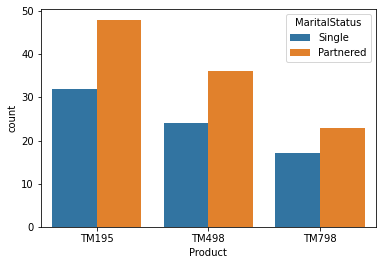

In [41]:
sns.countplot(x="Product",hue="MaritalStatus",data=df)

In [42]:
pd.crosstab(df["Product"],df["MaritalStatus"])

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17

<AxesSubplot:xlabel='Product', ylabel='Age'>

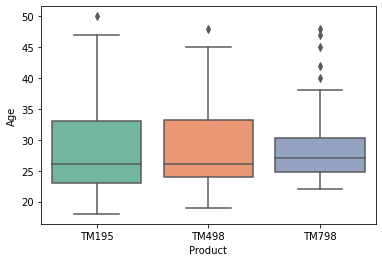

In [43]:
sns.boxplot(x="Product",y="Age",data=df,palette="Set2")

<AxesSubplot:xlabel='Product', ylabel='Education'>

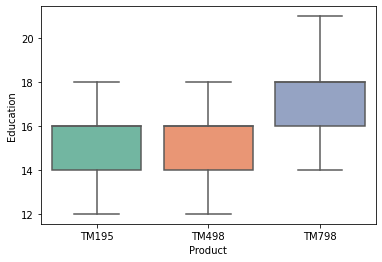

In [46]:
sns.boxplot(x="Product",y="Education",data=df,palette="Set2") #no. of years they spent in education

<AxesSubplot:xlabel='Product', ylabel='Usage'>

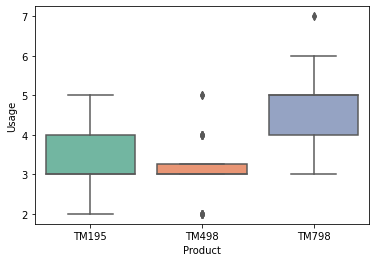

In [47]:
sns.boxplot(x="Product",y="Usage",data=df,palette="Set2")

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

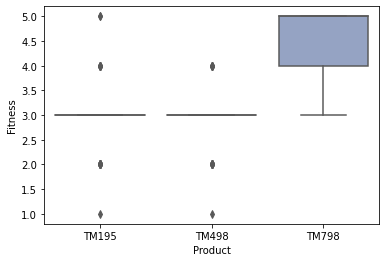

In [48]:
sns.boxplot(x="Product",y="Fitness",data=df,palette="Set2")

<AxesSubplot:xlabel='Product', ylabel='Miles'>

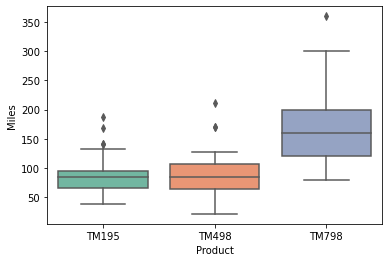

In [49]:
sns.boxplot(x="Product",y="Miles",data=df,palette="Set2")

<AxesSubplot:xlabel='Product', ylabel='Income'>

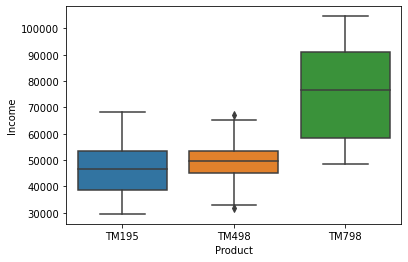

In [44]:
sns.boxplot(x="Product",y="Income",data=df)

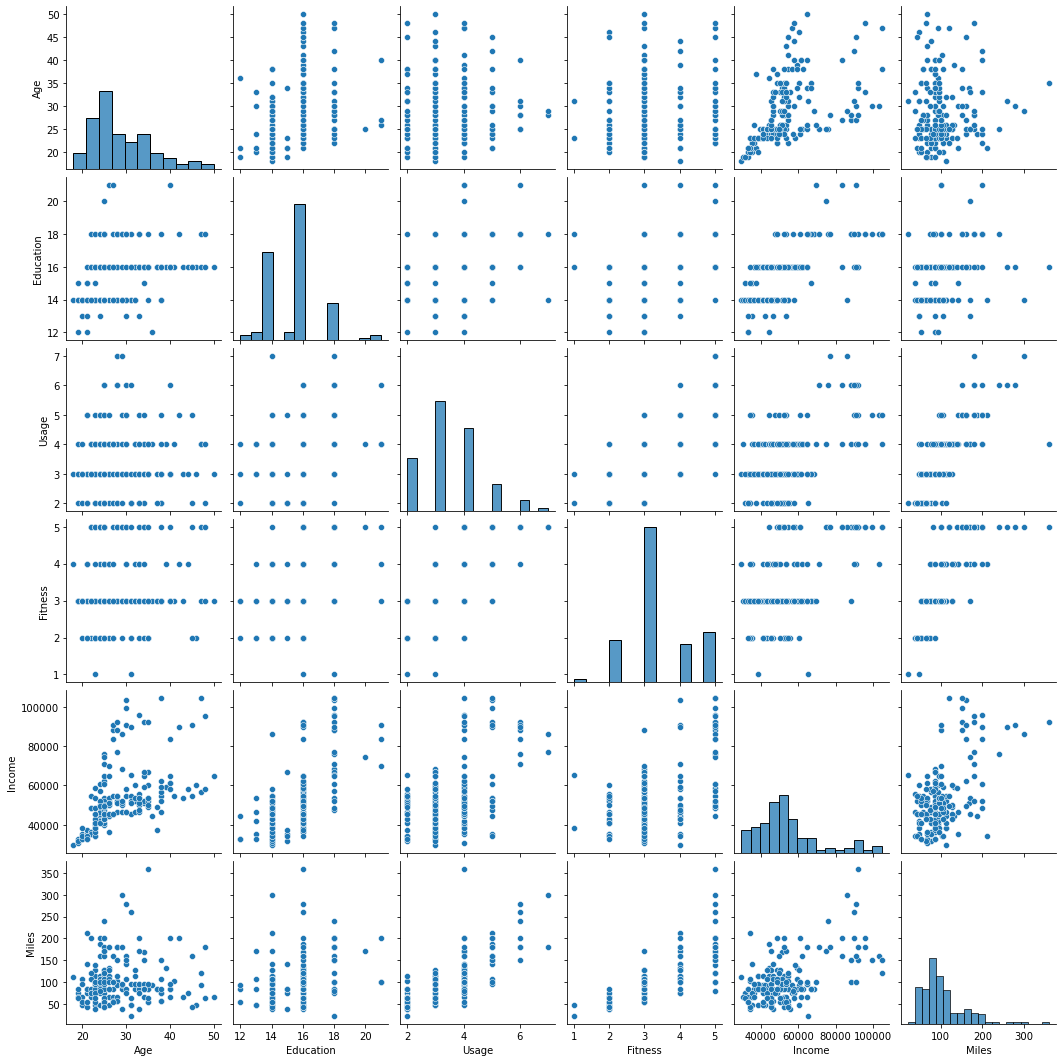

In [45]:
sns.pairplot(df)  #correlation with the attributes
plt.show()

In [50]:
corr=df.corr()  #no realtion btw age and fitness --- more miles good fitness---0-bad,0.5-moderate ,1-good
corr

Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000

<AxesSubplot:>

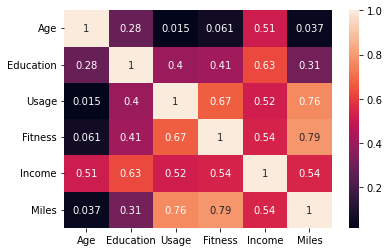

In [51]:
sns.heatmap(corr,annot=True)  #orange 1.0 to 0.6 they are highly correlated

doing same thing with the titanic dataset


In [75]:
df1=pd.read_csv("titanic-training-data.csv")

In [77]:
df1.sample(10)

PassengerId  Survived  Pclass  \
116          117         0       3   
725          726         0       3   
227          228         0       3   
165          166         1       3   
581          582         1       1   
756          757         0       3   
52            53         1       1   
650          651         0       3   
23            24         1       1   
653          654         1       3   

                                                  Name     Sex   Age  SibSp  \
116                               Connors, Mr. Patrick    male  70.5      0   
725                                Oreskovic, Mr. Luka    male  20.0      0   
227                    Lovell, Mr. John Hall ("Henry")    male  20.5      0   
165    Goldsmith, Master. Frank John William "Frankie"    male   9.0      0   
581  Thayer, Mrs. John Borland (Marian Longstreth M...  female  39.0      1   
756                       Carlsson, Mr. August Sigfrid    male  28.0      0   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
650                                  Mitkoff, Mr. Mito    male   NaN      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
653                      O'Leary, Miss. Hanora "Norah"  female   NaN      0   

     Parch     Ticket      Fare Cabin Embarked  
116      0     370369    7.7500   NaN        Q  
725      0     315094    8.6625   NaN        S  
227      0  A/5 21173    7.2500   NaN        S  
165      2     363291   20.5250   NaN        S  
581      1      17421  110.8833   C68        C  
756      0     350042    7.7958   NaN        S  
52       0   PC 17572   76.7292   D33        C  
650      0     349221    7.8958   NaN        S  
23       0     113788   35.5000    A6        S  
653      0     330919    7.8292   NaN        Q

In [78]:
df1.shape

(891, 12)

In [79]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
df1.describe(include="all")  

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [81]:
#here survived is the dependent variable

<AxesSubplot:xlabel='Survived', ylabel='count'>

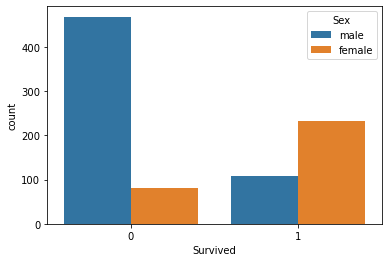

In [82]:
sns.countplot(x="Survived",hue="Sex",data=df1)

<AxesSubplot:xlabel='Survived', ylabel='count'>

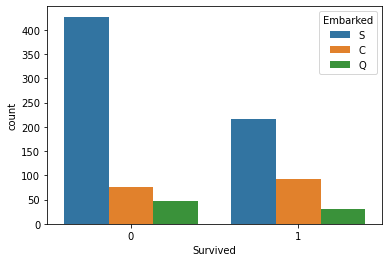

In [83]:
sns.countplot(x="Survived",hue="Embarked",data=df1)

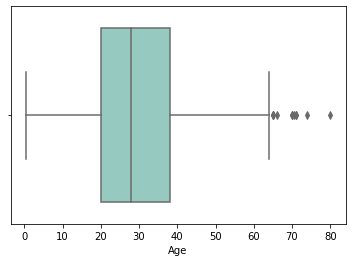

In [84]:
sns.boxplot(x="Age",data=df1,palette="Set3")
plt.show()

In [86]:
q3=38.000000
q1=20.125000
iqr=q3-q1    
iqr

17.875

In [87]:
q1-1.5*iqr

-6.6875

In [88]:
q3+1.5*iqr

64.8125